# Combined Fit

Based on https://root.cern/doc/master/combinedFit_8C.html.

RooFit documentation: https://root.cern/doc/master/combinedFit_8C.html

The idea consists in having two datasets: one is generated from a model where we have both gaussian signal and exponential background, while the second consists in an exponential background only.
The parameters that model the background are the same in both situtations, so we want to fit both of them simultaneously.


In [15]:
import ROOT

In [16]:
# Define variables
m = ROOT.RooRealVar("mass", "mass", 0, 200)
mean = ROOT.RooRealVar("mean", "mean", 90, 80, 120)
sigma = ROOT.RooRealVar("sigma", "sigma", 5, 0, 10)
tau = ROOT.RooRealVar("tau", "tau", -0.01, -1, 0)
nsig = ROOT.RooRealVar("nsig", "number of signal events in signalRange", 1000, 0.0, 10000)
nbkg = ROOT.RooRealVar("nbkg", "number of background events in signalRange", 100000, 0.0, 1000000)

# Build PDFs
gauss = ROOT.RooGaussian("gauss", "gauss", m, mean, sigma)
exp = ROOT.RooExponential("exp", "exp", m, tau)
model = ROOT.RooAddPdf("model", "sig + bkg", ROOT.RooArgList(gauss, exp), ROOT.RooArgList(nsig, nbkg))

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 10] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.


In [20]:
data_model = model.generate(m, 100000)
data_bkg = exp.generate(m, 10000)

In [21]:
mass_frame = m.frame(ROOT.RooFit.Title("Mass"))
data_model.plotOn(mass_frame)
model.plotOn(mass_frame)
data_bkg.plotOn(mass_frame)
exp.plotOn(mass_frame)

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 10000 will supercede previous event count of 100000 for normalization of PDF projections


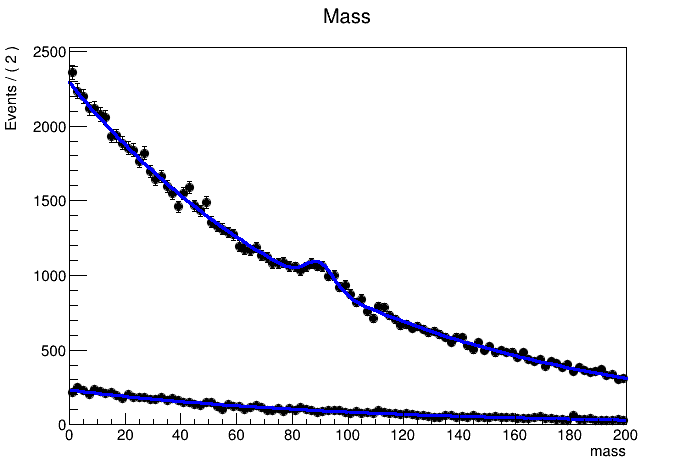

In [22]:
c = ROOT.TCanvas("", "")
mass_frame.Draw()
c.Draw()

In [23]:
data_model_nll = model.createNLL(data_model)
data_bkg_nll = exp.createNLL(data_bkg)

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.


In [24]:
#minimizer = ROOT.RooMinuit(data_model_nll * data_bkg_nll)
minimizer = ROOT.RooMinuit(data_model_nll)
minimizer.migrad()

NotImplementedError: 